In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

print(StandardScaler, MinMaxScaler, Normalizer)

<class 'sklearn.preprocessing._data.StandardScaler'> <class 'sklearn.preprocessing._data.MinMaxScaler'> <class 'sklearn.preprocessing._data.Normalizer'>


In [117]:
# A dataset of acceleration information of people playing basketball.
# The files contain the following 5 actions:
# dribble the ball
# hold the ball
# pass the ball
# pick up the ball
# shoot the ball

# NOTE: It's the dataset I used in lab 3


dribble_df = pd.read_csv("D_dribble1.txt", skiprows=3)
dribble_df.columns = dribble_df.columns.str.strip()
dribble_df["action"] = "dribble"

hold_df = pd.read_csv("D_hold1.txt", skiprows=3)
hold_df.columns = hold_df.columns.str.strip()
hold_df["action"] = "hold"

pass_df = pd.read_csv("D_pass1.txt", skiprows=3)
pass_df.columns = pass_df.columns.str.strip()
pass_df["action"] = "pass"

pickup_df = pd.read_csv("D_pickup1.txt", skiprows=3)
pickup_df.columns = pickup_df.columns.str.strip()
pickup_df["action"] = "pickup"

shoot_df = pd.read_csv("D_shoot1.txt", skiprows=3)
shoot_df.columns = shoot_df.columns.str.strip()
shoot_df["action"] = "shoot"

basketball_df = pd.concat([dribble_df, hold_df, pass_df, pickup_df, shoot_df], ignore_index=True)

basketball_df.head(5)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),action
0,0.000000,3.428497,9.112331,-2.047042,9.948847,101.873802,69.381287,dribble
1,0.009703,3.447650,9.285912,-2.331953,10.176072,103.247643,69.631172,dribble
2,0.019734,3.506308,9.212888,-2.244564,10.109875,102.827530,69.163811,dribble
3,0.029704,3.703830,8.972271,-1.990779,9.908744,101.590256,67.568748,dribble
4,0.039805,3.902549,8.799889,-1.545457,9.749685,99.120628,66.083809,dribble


In [118]:
x = basketball_df.drop("action", axis=1).to_numpy()
y = basketball_df["action"].map({"dribble": 0, "hold": 1, "pass": 2, "pickup": 3, "shoot": 4}).to_numpy()
actions = ["dribble", "hold", "pass", "pickup", "shoot"]
feature_names = list(dribble_df.columns)[:-1]
print(feature_names)

['Time (s)', 'X (m/s2)', 'Y (m/s2)', 'Z (m/s2)', 'R (m/s2)', 'Theta (deg)', 'Phi (deg)']


In [119]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

covariance_matrix = np.cov(x_scaled, rowvar=False)
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 1.00026274 -0.1305657   0.12149412  0.09689539 -0.02999717 -0.09236635
  -0.03459692]
 [-0.1305657   1.00026274 -0.38200203 -0.28098193  0.14846269  0.26732141
  -0.25919469]
 [ 0.12149412 -0.38200203  1.00026274  0.05828496  0.40608776 -0.01384881
  -0.3103133 ]
 [ 0.09689539 -0.28098193  0.05828496  1.00026274 -0.24103193 -0.92645679
   0.07545155]
 [-0.02999717  0.14846269  0.40608776 -0.24103193  1.00026274  0.13804442
   0.0450818 ]
 [-0.09236635  0.26732141 -0.01384881 -0.92645679  0.13804442  1.00026274
  -0.11445992]
 [-0.03459692 -0.25919469 -0.3103133   0.07545155  0.0450818  -0.11445992
   1.00026274]]


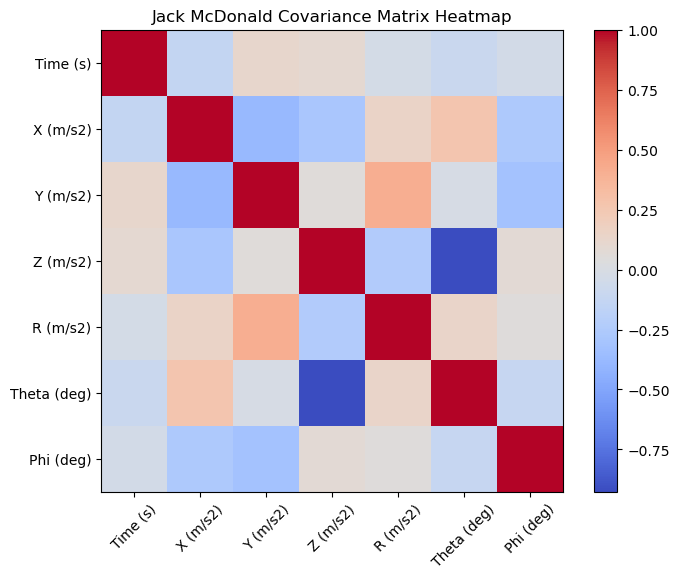

In [120]:
# covariance matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, interpolation="none", cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.yticks(range(len(feature_names)), feature_names)
plt.title("Jack McDonald Covariance Matrix Heatmap")

plt.savefig("jack_covariance_heatmap.png")

plt.show()

The strongest covariance is between Theta angle and Z acceleration. Most of the other features don't have a very strong covariance. There are some which are a little bit strong, like Y acceleration and X acceleration.

In [122]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvectors_df = pd.DataFrame(
    eigenvectors,
    index=feature_names,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]
)

print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors_df)

Eigenvalues:
[2.20807783 1.5458597  1.12818398 0.99734259 0.86250179 0.05860763
 0.20126568]
Eigenvectors:
                  PC1       PC2       PC3       PC4       PC5       PC6  \
Time (s)    -0.144317  0.218236  0.106207  0.742076  0.607870  0.006110   
X (m/s2)     0.373902 -0.289496  0.439572 -0.298697  0.487061 -0.093286   
Y (m/s2)    -0.057644  0.754452  0.019136 -0.062357 -0.203447 -0.163522   
Z (m/s2)    -0.624480 -0.030910  0.196678 -0.226767  0.100285  0.692121   
R (m/s2)     0.219211  0.469472 -0.267946 -0.472450  0.500944  0.166719   
Theta (deg)  0.612748  0.031551 -0.144798  0.285182 -0.193537  0.673786   
Phi (deg)   -0.150191 -0.277512 -0.814670 -0.015934  0.231121 -0.060879   

                  PC7  
Time (s)    -0.006809  
X (m/s2)     0.498011  
Y (m/s2)     0.595899  
Z (m/s2)     0.172844  
R (m/s2)    -0.397237  
Theta (deg)  0.172640  
Phi (deg)    0.423517  


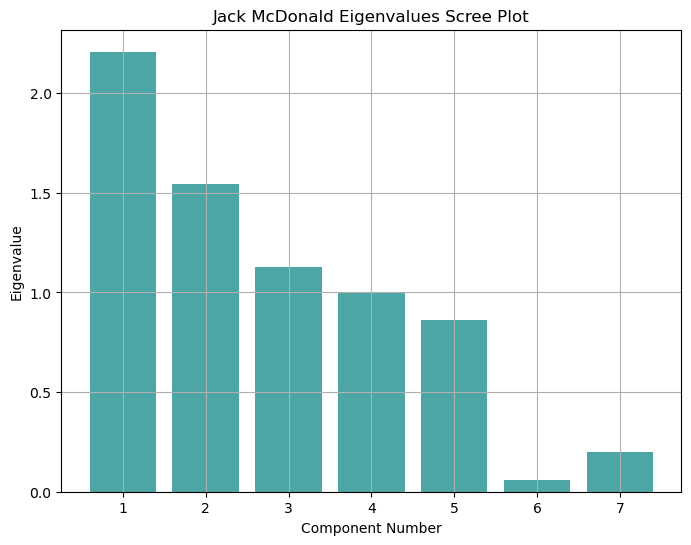

In [123]:
# eigenvalues scree plot
plt.figure(figsize=(8, 6))
components = np.arange(1, len(eigenvalues) + 1)
plt.bar(components, eigenvalues, color="teal", alpha=0.7)
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.title("Jack McDonald Eigenvalues Scree Plot")
plt.xticks(components)
plt.grid(True)

plt.savefig("jack_eigenvalues_scree_plot.png")

plt.show()

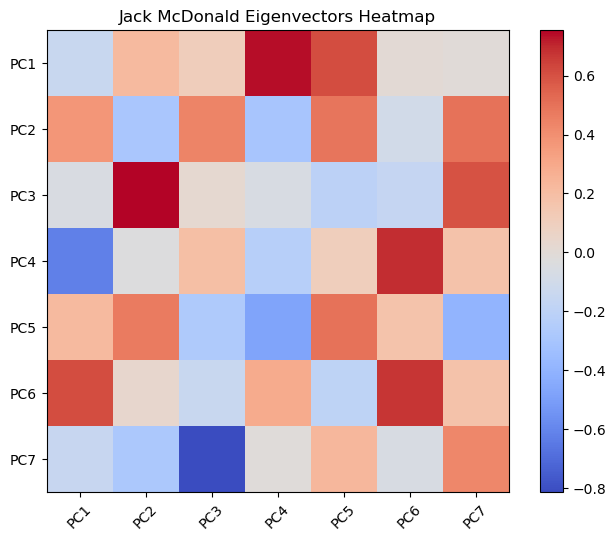

In [124]:
# eigenvectors heatmap
plt.figure(figsize=(8, 6))
plt.imshow(eigenvectors, interpolation="none", cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(eigenvectors_df.columns)), eigenvectors_df.columns, rotation=45)
plt.yticks(range(len(eigenvectors_df.columns)), eigenvectors_df.columns)
plt.title("Jack McDonald Eigenvectors Heatmap")

plt.savefig("jack_eigenvectors_heatmap.png")

plt.show()

2D PCA Explained Variance Ratio:
[0.31535683 0.22077909]


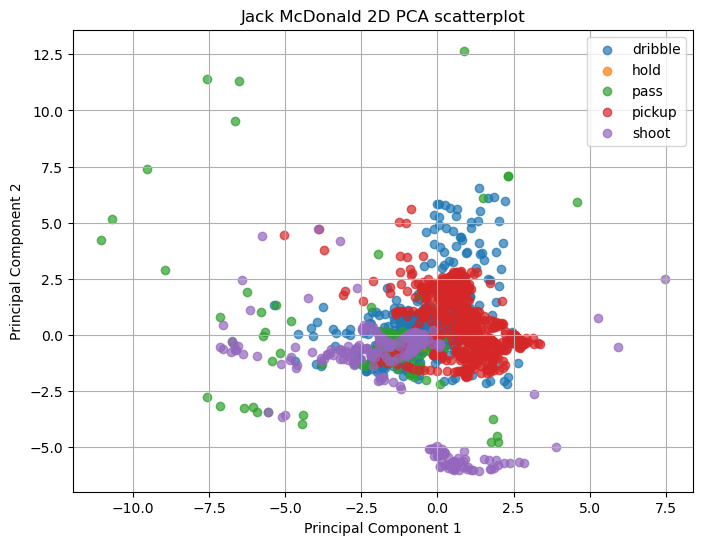

In [125]:
# 2D PCA scatterplot
pca2d = PCA(n_components=3)
x_pca_2d = pca2d.fit_transform(x_scaled)
pca2d_df = pd.DataFrame(data=x_pca_2d, columns=["PC1", "PC2"])
pca2d_df["action"] = basketball_df["action"]

print("2D PCA Explained Variance Ratio:")
print(pca2d.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
for action in actions:
    subset = pca2d_df[pca2d_df["action"] == action]
    plt.scatter(subset["PC1"], subset["PC2"], label=action, alpha=0.7)
    
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Jack McDonald 2D PCA scatterplot")
plt.legend()
plt.grid(True)

plt.savefig("jack_pca_scatterplot.png")

plt.show()

The dots are clumped together, so more than just these two principal components are needed.

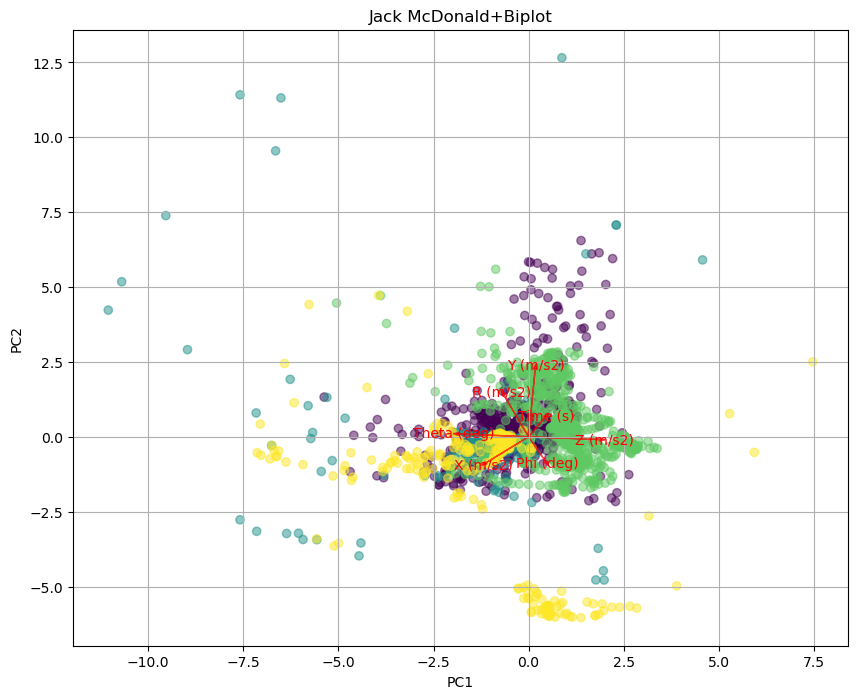

In [140]:
# the biplot function like we were shown in the quiz
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 8))
    # Scatter plot of the PCA scores
    plt.scatter(xs, ys, c=y, cmap='viridis', alpha=0.5)
    
    for i in range(n):
        # Plot arrows for feature loadings, scaled for visibility
        plt.arrow(0, 0, coeff[i, 0] * 3, coeff[i, 1] * 3, color='r', alpha=0.7, head_width=0.1)
        if labels is None:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, "Var"+str(i+1), color='r', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 3.2, coeff[i, 1] * 3.2, labels[i], color='r', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Jack McDonald+Biplot")
    plt.grid(True)

    plt.savefig("jack_pca_biplot.png")
    
    plt.show()

loadings = pca2d.components_.T

biplot(x_pca_2d, loadings, labels=feature_names)

Observations:
Y mainly influences PC2.
Theta and Z acceleration mainly influence PC1.
There are strong negative correlations between Theta and Z acceleration, R and Phi, and Time and X acceleration.
None of the positive correlations are as strong as those three negative correlations.
Time doesn't have much influence, and it influences PC1 and PC2 about evenly.
Theta, Y acceleration, and Z aceleration have the most influence.